# Análisis de Clustering con Clustering Lib

Este notebook demuestra cómo un data scientist podría utilizar la biblioteca Clustering Lib para abordar un nuevo problema de clustering. Cubriremos los pasos típicos, desde la carga y exploración de datos hasta la selección del número óptimo de clusters, la aplicación de algoritmos de clustering y la interpretación de los resultados.

## 1. Importar las Bibliotecas Necesarias
Comenzamos importando las bibliotecas requeridas para nuestro análisis.

In [2]:
# Importar bibliotecas estándar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importar módulos de Clustering Lib
# from clustering_lib.datasets.load_datasets import load_custom_dataset
from clustering_lib.preprocessing.scaling import StandardScaler
from clustering_lib.preprocessing.dimensionality_reduction import PCA
from clustering_lib.evaluation.selection import (
    plot_elbow_method,
    plot_silhouette_scores,
    plot_combined_metrics
)
from clustering_lib.algorithms.auto_clustering import AutoClustering
from clustering_lib.visualization.plots import plot_clusters_2d


## 2. Cargar y Explorar los Datos

Para este ejemplo, utilizaremos un conjunto de datos simulado que representa un problema real de clustering. Supongamos que tenemos datos de clientes y queremos segmentarlos en grupos similares.

### 2.1. Cargar el Conjunto de Datos

In [3]:
# Supongamos que tenemos un conjunto de datos en formato CSV
# Para este ejemplo, generaremos datos sintéticos
from sklearn.datasets import make_blobs

# Generar datos sintéticos
X, y_true = make_blobs(n_samples=300, centers=5, cluster_std=0.60, random_state=42)


## 2.2. Visualización Inicial de los Datos

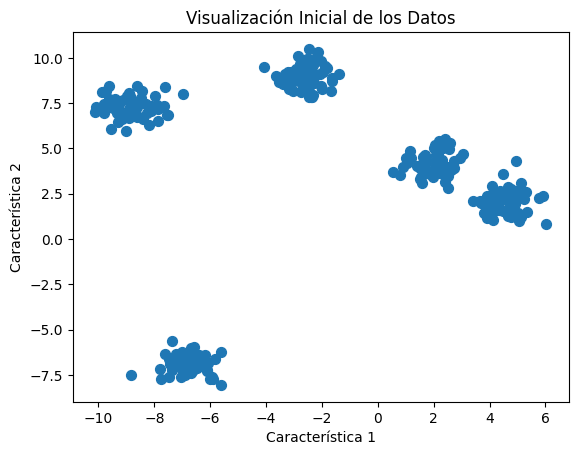

In [4]:
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title('Visualización Inicial de los Datos')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()


## 3. Preprocesamiento de los Datos

Antes de aplicar algoritmos de clustering, es importante preprocesar los datos.

### 3.1. Escalado de Características

In [5]:
# Escalado de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### 3.2. Reducción de Dimensionalidad (si es necesario)

En este caso, nuestros datos ya están en 2D, pero si tuviéramos más dimensiones, podríamos aplicar PCA.

## 4. Determinar el Número Óptimo de Clusters
Utilizaremos varias técnicas para encontrar el número óptimo de clusters k.

### 4.1. Método del Codo (Elbow Method)

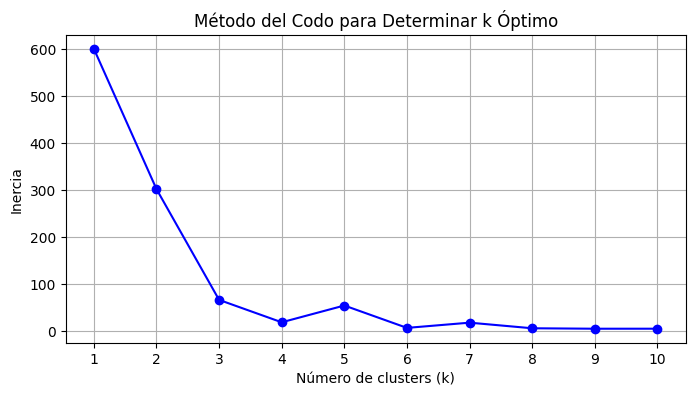

In [6]:
plot_elbow_method(X_scaled, max_k=10)


**Interpretación**: Buscamos el punto donde la disminución de la inercia se suaviza (el "codo" del gráfico).

### 4.2. Análisis del Coeficiente de Silueta

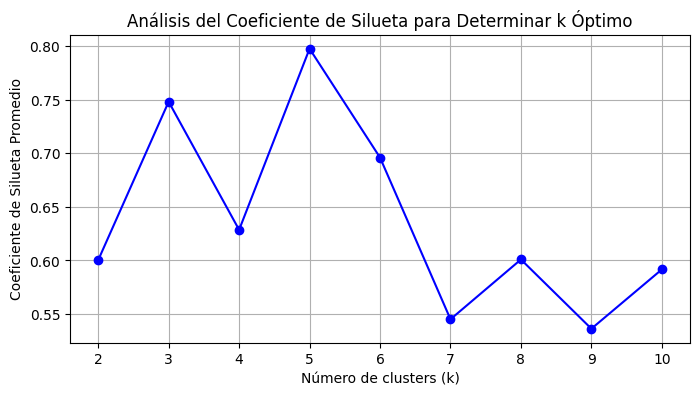

In [7]:
plot_silhouette_scores(X_scaled, max_k=10)


**Interpretación**: El valor de k que maximiza el coeficiente de silueta es un buen candidato.

### 4.3. Comparación de Métricas

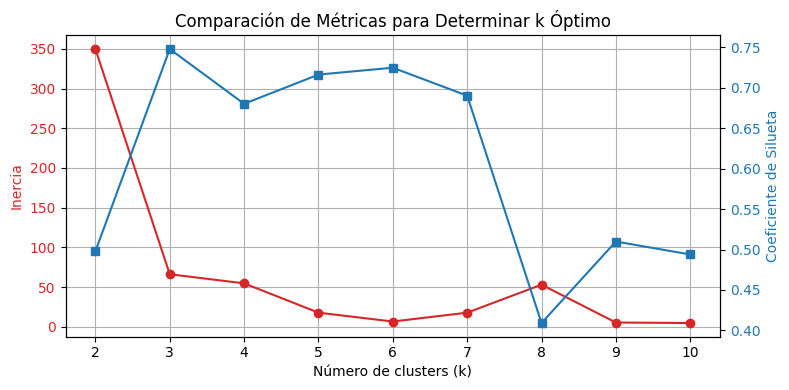

In [8]:
plot_combined_metrics(X_scaled, max_k=10)


**Interpretación**: Al observar ambas métricas juntas, podemos tomar una decisión más informada.

## 5. Aplicar Clustering con el Número Óptimo de Clusters
Basándonos en los análisis anteriores, supongamos que decidimos que el número óptimo de clusters es 5.

### 5.1. Clustering Automatizado

In [9]:
auto_cluster = AutoClustering(method='kmeans', max_k=10, criterion='silhouette', random_state=42)
labels = auto_cluster.fit_predict(X_scaled)
print(f"Número óptimo de clusters según AutoClustering: {auto_cluster.optimal_k}")


Número óptimo de clusters según AutoClustering: 4


## 6. Visualización de los Resultados

### 6.1. Visualización en 2D

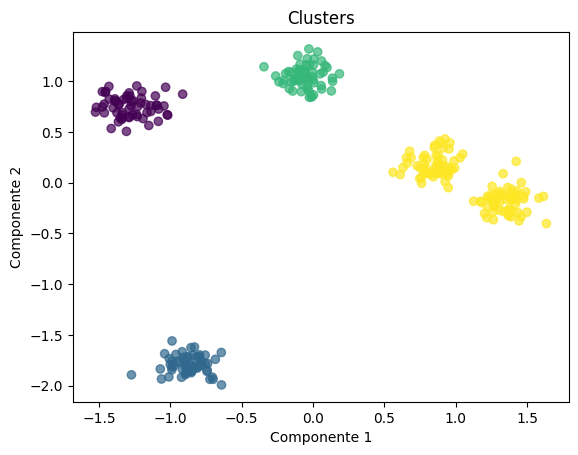

In [10]:
plot_clusters_2d(X_scaled, labels)


### 6.2. Análisis de los Clusters

Podemos analizar cada cluster para entender sus características.

In [11]:
# Convertir los datos y las etiquetas en un DataFrame
df = pd.DataFrame(X_scaled, columns=['Característica 1', 'Característica 2'])
df['Cluster'] = labels

# Mostrar estadísticas descriptivas por cluster
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)


         Característica 1  Característica 2
Cluster                                    
0               -1.276971          0.751110
1               -0.869745         -1.794499
2               -0.052733          1.047536
3                1.099725         -0.002073


## 7. Interpretación y Conclusiones

+ **Segmentación de Clientes**: Cada cluster representa un grupo distinto de clientes con características similares.
+ **Acciones Específicas**: Podemos diseñar estrategias de marketing específicas para cada segmento.

## 8. Pasos Adicionales

+ **Validación de Clusters**: Utilizar otras métricas y métodos para validar la robustez de los clusters.
+ **Exploración de Otros Algoritmos**: Probar algoritmos como DBSCAN o clustering jerárquico.
+ **Visualizaciones Avanzadas**: Crear gráficos más detallados o interactivos para presentar los resultados.

## 9. Uso de Visualizaciones Interactivas

Si trabajamos en un entorno compatible, podemos utilizar visualizaciones interactivas.

In [ ]:
from clustering_lib.visualization.interactive import interactive_clustering

# Visualización interactiva
interactive_clustering(X_scaled, max_k=10)


interactive(children=(IntSlider(value=2, description='k', max=10, min=2), Output()), _dom_classes=('widget-int…

*Nota: Esta celda genera una interfaz interactiva para explorar diferentes valores de k. Ejecuta esta celda en un Jupyter Notebook para utilizar la funcionalidad.*

## 10. Guardar el Modelo y las Etiquetas

Podemos guardar el modelo ajustado y las etiquetas asignadas para uso futuro.

In [13]:
import pickle

# Guardar el modelo
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(auto_cluster.clusterer, f)

# Guardar las etiquetas en el DataFrame original
df_original = pd.DataFrame(X, columns=['Característica 1', 'Característica 2'])
df_original['Cluster'] = labels

# Guardar el DataFrame
df_original.to_csv('clientes_segmentados.csv', index=False)


## Conclusión

En este notebook, hemos simulado cómo un data scientist puede utilizar Clustering Lib para abordar un problema de clustering. Hemos seguido un flujo típico:

1. Carga y exploración de datos.
2. Preprocesamiento (escalado de características).
3. Determinación del número óptimo de clusters utilizando diferentes métodos.
4. Aplicación del algoritmo de clustering con el número óptimo de clusters.
5. Visualización y análisis de los resultados.
6. Interpretación y conclusiones.
7. Clustering Lib ofrece herramientas útiles y flexibles para facilitar cada paso del proceso de clustering, desde la exploración inicial hasta la interpretación final.

## Referencias

+ Documentación de Clustering Lib: https://github.com/miguel-conde/clustering-lib
+ Scikit-learn: https://scikit-learn.org/
+ Matplotlib: https://matplotlib.org/